In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
class SVM:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1: "r", -1: "b"}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1, 1, 1)

    def fit(self, dataset):
        self.dataset = dataset
        opt_step = 0
        opt_dict = {}  # { ||w||: [w, b] }
        transforms = [[1, 1], [-1, 1], [-1, -1], [1, -1]]
        data = []
        for yi in self.dataset:
            for features in self.dataset[yi]:
                for feature in features:
                    data.append(feature)

        self.max_fval = max(data)
        self.min_fval = min(data)
        data = None

        step_sizes = [self.max_fval * 0.1, self.max_fval * 0.01,
                      self.max_fval * 0.001]
        b_range_multiple = 5
        b_multiple = 5
        opt_val = self.max_fval * 10

        for step in step_sizes:
            w = np.array([opt_val, opt_val])
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_fval*b_range_multiple), self.max_fval*b_range_multiple, step*b_multiple):
                    for transform in transforms:
                        w_t = w * transform

                        found_option = True
                        for yi in self.dataset:
                            for xi in self.dataset[yi]:
                                if not yi*(np.dot(w_t, xi)+b) >= 1:
                                    found_option = False

                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]

                if w[0] < 0:
                    optimized = True
                    print(f"Optimization Step: {opt_step}")
                    opt_step += 1
                else:
                    w = w - step

            norms = []
            for norm in opt_dict:
                norms.append(norm)
            norms = sorted(norms)
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            opt_val = opt_choice[0][0] + step*2

        print("Optimization Done!!\n")

    def predict(self, features):
        prediction = np.sign(np.dot(self.w, np.array(features)) + self.b)
        if prediction != 0 and self.visualization:
            self.ax.scatter(features[0], features[1],
                            marker='*', c=self.colors[prediction])

        print(
            f"Featureset: {features} | Prediction: {self.colors[prediction]}")
        return prediction

    def visulaize(self):
        for yi in self.dataset:
            for xi in self.dataset[yi]:
                self.ax.scatter(xi[0], xi[1], color=self.colors[yi])

        # hyperplane(v) = w.x+b
        def hyperplane(x, w, b, v):
            return (v-w[0]*x-b)/w[1]

        data_range = (self.min_fval*0.9, self.max_fval*1.1)
        hyper_min = data_range[0]
        hyper_max = data_range[1]

        nsv0 = hyperplane(hyper_min, self.w, self.b, -1)
        nsv1 = hyperplane(hyper_max, self.w, self.b, -1)
        self.ax.plot([hyper_min, hyper_max], [nsv0, nsv1], "k")

        db0 = hyperplane(hyper_min, self.w, self.b, 0)
        db1 = hyperplane(hyper_max, self.w, self.b, 0)
        self.ax.plot([hyper_min, hyper_max], [db0, db1],
                     "y--", label="Decision Boundary")

        psv0 = hyperplane(hyper_min, self.w, self.b, 1)
        psv1 = hyperplane(hyper_max, self.w, self.b, 1)
        self.ax.plot([hyper_min, hyper_max], [psv0, psv1], "k")

        self.ax.legend(loc=4)
        plt.show()

In [7]:
data_set = {-1: np.array([[1, 7], [2, 8], [3, 8]]), 1: np.array([[5, 1], [6, -1], [7, 3]])}
test_data = [[0, 10], [1, 3], [3, 4], [3, 5], [5, 5], [5, 6], [6, -5], [5, 8]]

Optimization Step: 0
Optimization Step: 1
Optimization Step: 2
Optimization Done!!

Featureset: [0, 10] | Prediction: b
Featureset: [1, 3] | Prediction: b
Featureset: [3, 4] | Prediction: b
Featureset: [3, 5] | Prediction: b
Featureset: [5, 5] | Prediction: r
Featureset: [5, 6] | Prediction: b
Featureset: [6, -5] | Prediction: r
Featureset: [5, 8] | Prediction: b


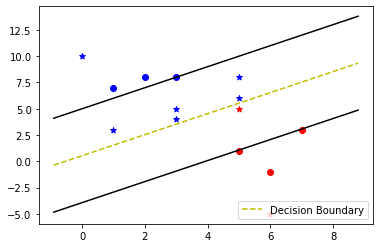

In [8]:
model = SVM()
model.fit(data_set)

for t in test_data:
    model.predict(t)

model.visulaize()